In [20]:
import tensorflow as tf
from tensorflow import keras
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.0.0-rc1


In [2]:
#패션 MNIST 데이터셋 임포트하기
#훈련 = 6만개, 평가 = 1만개

fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
#load_data() 함수 호출시, 4개의 넘파이 배열 반환
#이미지는 28*28 크기의 넘파이 배열, 픽셀 값은 0~255
#레이블은 0~9 정수 배열(옷의 클래스)

4423680/4422102 [==============================] - 1s 0us/step


In [3]:
class_name = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
#데이터 탐색 : 모델 훈련전 데이터셋 구조 알아보기
train_images.shape #train image는 6만개며 각 이미지는 28*28 픽셀 표현

(60000, 28, 28)

In [5]:
len(train_images)

60000

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
len(test_images)

10000

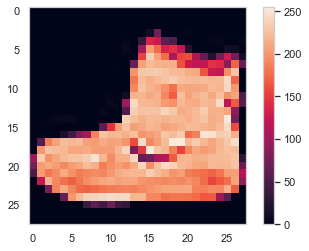

In [24]:
#데이터 전처리 : 네트워크 훈련전 데이터 전처리는 필수!
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()
#픽셀 값의 범위가 0~255사이라는 것을 알 수 있다. 이를 0~1사이로 전처리해야한다.

In [25]:
#신경망 모델에 주입하기 전에 이 값의 범위를 0~1사이로 조정
#훈련세트와 테스트 세트를 동일한 방식으로 전처리하는 것이 중요하다!!
train_images = train_images / 255.0
test_images = test_images / 255.0

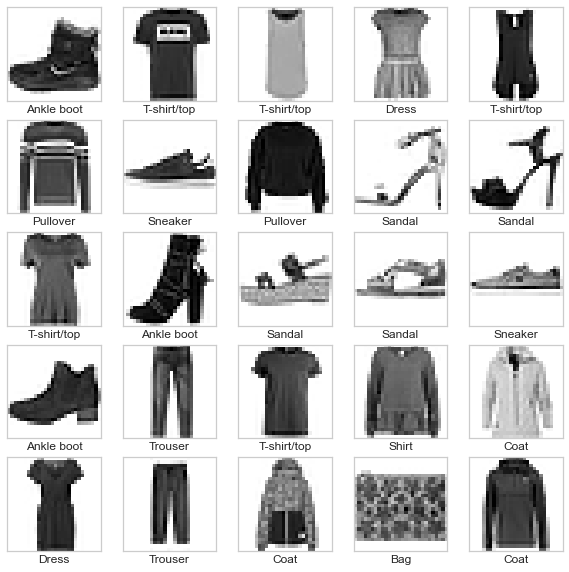

In [27]:
#훈련세트에서 25개 이미지, 클래스 추력
#데이터 포맷이 올바른지 확인
plt.figure(figsize = (10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap = plt.cm.binary)
    plt.xlabel(class_name[train_labels[i]])

In [28]:
#모델 구성 : 신경말 모델을 만들려면 모델의 층을 구성한 다음 모델을 컴파일한다.
#층 설정 : layer는 주입된 데이터에서 표현을 추출
#tf.kears.layers.Dense와 같은 층들의 parameter는 훈련동안 학습이 된다.


model = tf.keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)), 
    #2차원 배열(28*28)의 이미지 포맷을 28*28 = 784픽셀의 1차원 배열로 변환.
    #이 층에는 가중치가 없고 데이터를 변화하기만 한다.
    keras.layers.Dense(128, activation = 'relu'),
    #Densely-connected or Fully-connected layer라고 불린다.
    #첫번째 Dense층은 128개의 노드(뉴런)가진다.
    keras.layers.Dense(10, activation = 'softmax')
    #두번째 Dense층은 10개의 노드(뉴런)과 소프트 맥스 층이다.
    #즉, 10개의 확률을 반환하고 반환된 값의 전체 합은 1이다.
    #각 노드는 현재 이미지가 10개의 클래스 중 하나에 속할 확률 반환
])

In [33]:
#모델 컴파일 : 모델 훈련하기 전에 Loss function, Optimizer, Metrics 설정
#Loss function : 훈련 동안 모델의 오차 측정(이 함수를 최소화)
#Optimizer : 데이터와 Loss function 바탕으로 모델의 업데이트 방법을 결정
#Metrics : 훈련단계와 테스트단계를 모니터링하기위해 사용.
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
)

In [35]:
#모델 훈련
#1단계 : 훈련 데이터를 모델에 주입(이 예에서는 train_images, train_labels)
#2단계 : 모델이 이미지와 레이브를 매핑하는 방법을 배운다.(Supervised Learning)
#3단계 : 테스트 세트에 대한 모델의 예측을 만든다.(이 예에서는 test_images, test_labels)

#훈련시작하기 위해 model.fit 메서드 호출하면 모델이 훈련데이터를 학습
model.fit(train_images, train_labels, epochs = 5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 53us/sample - loss: 0.4930 - accuracy: 0.8268
Epoch 2/5
60000/60000 [==============================] - 3s 44us/sample - loss: 0.3760 - accuracy: 0.8650
Epoch 3/5
60000/60000 [==============================] - 3s 44us/sample - loss: 0.3375 - accuracy: 0.8774
Epoch 4/5
60000/60000 [==============================] - 3s 50us/sample - loss: 0.3136 - accuracy: 0.8852
Epoch 5/5
60000/60000 [==============================] - 3s 48us/sample - loss: 0.2950 - accuracy: 0.8919


In [37]:
#정확도 평가 : 훈련이 끝났으니 테스트 세트로 모델 성능 비교
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 2)

print('테스트 정확도:', test_acc)

10000/1 - 0s - loss: 0.3097 - accuracy: 0.8736
테스트 정확도: 0.8736


In [38]:
#테스트 정확도가 훈련 정확도보다 조금 낮다. 그 차이는 overfitting!!

In [39]:
#예측 만들기 : 훈련된 모델을 사용하여 이미지에 대한 예측을 만들 수 있다.
predictions = model.predict(test_images)

In [40]:
#테스트 세트에 있는 각 이미지 레이블 예측 : 첫번째 예측
predictions[0]

array([1.6060436e-06, 4.1829537e-08, 1.8182308e-06, 6.4929059e-06,
       2.2040296e-05, 2.1977266e-02, 1.0199122e-05, 6.2682204e-02,
       2.3084457e-04, 9.1506743e-01], dtype=float32)

In [41]:
#2번째 Dense층이 10개 노드니까 softmax로 확률값이 나온건데 여기서 최댓값을 구해보자
np.argmax(predictions[0])

9

In [42]:
class_name[9] #즉, 모델은 이 테스트 세트의 첫번째 이미지를 앵클 부츠로 가장 확신

'Ankle boot'

In [43]:
test_labels[0] #실제로 정답이다.

9

In [63]:
#10개 클래스에 대한 예측을 모두 그래프로 표현
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_name[predicted_label],
                                  100*np.max(predictions_array),
                                  class_name[true_label]),
                                  color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

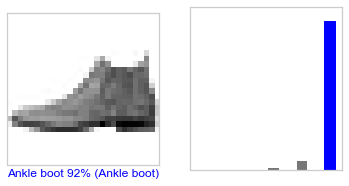

In [71]:
#0번째 원소의 이미지, 예측, 신뢰도 점수 배열을 확인
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

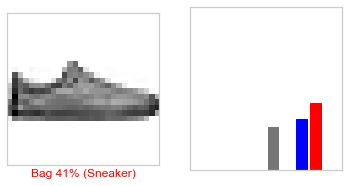

In [72]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

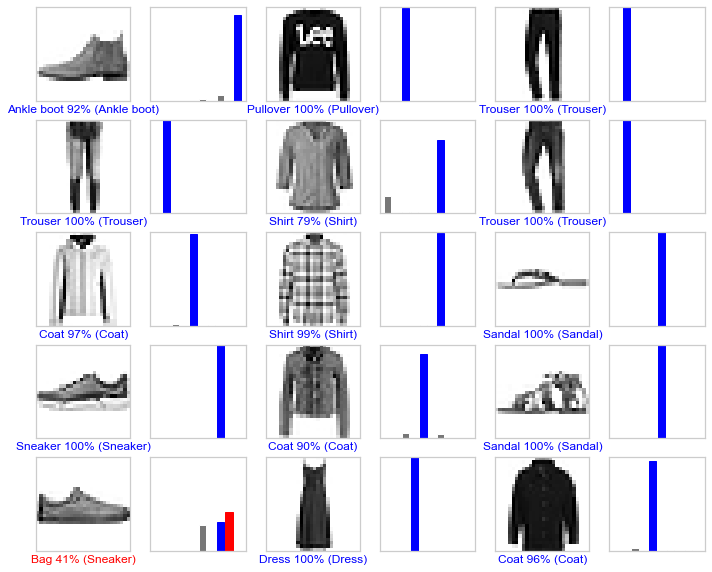

In [73]:
#처음 x개의 테스트 이미지와 예측 레이블, 진짜 레이블을 출력한다.
#올바른 예측은 파랑색으로 잘못된 예측은 빨간색으로 나타낸다.

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize = (2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows,2*num_cols, 2*i + 1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows,2*num_cols, 2*i + 2)
    plot_value_array(i, predictions, test_labels)
plt.show()

In [91]:
#훈련된 모델을 사용하여 한 이미지에 대한 예측을 만든다.
img = test_images[0]
print(img.shape)

(28, 28)


In [92]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [95]:
#이 이미지에 대한 예측을 만든다.
predictions_single = model.predict(img)
print(predictions_single)

[[1.6060377e-06 4.1829541e-08 1.8182277e-06 6.4929068e-06 2.2040300e-05
  2.1977259e-02 1.0199124e-05 6.2682174e-02 2.3084438e-04 9.1506755e-01]]


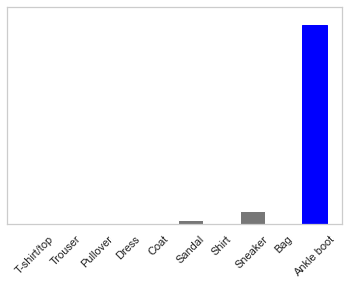

In [96]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_name, rotation = 45)

In [97]:
predictions_single.shape

(1, 10)